In [ ]:
"""Atividade 7: Teoria dos Jogos."""
import matplotlib.pyplot as plt
import numpy as np
from numba import jit, numba

In [ ]:
@jit(nopython=True)
def play(current: np.ndarray, players: np.ndarray, b: float):
    """Rode uma partida de um jogador com seus vizinhos, com ganho `b`."""
    neighbors = [(1, 0), (0, 1), (-1, 0), (0, -1), (0, 0)]
    current_state = players[current[0]][current[1]]
    gains = 0
    for i in neighbors:
        other_state = players[(current[0] + i[0]) % N][(current[1] + i[1]) % N]
        if current_state and other_state:
            gains += 1.0
        elif not current_state and other_state:
            gains += b
    return gains

In [ ]:
@jit(nopython=True)
def simulate(players: np.ndarray, passos: int, b: float, k: float):
    """Simula uma execução do dilema do prisioneiro."""
    # É necessário fazer a cópia para não interferir em execuções posteriores
    copy = players.copy()
    neighbors = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    neighbors_len = len(neighbors)
    for _ in range(passos):
        idx = np.random.randint(0, N, size=2)

        neighbor = np.random.randint(0, neighbors_len)
        idx_neighbor = np.array(
            [
                (idx[0] + neighbors[neighbor][0]) % N,
                (idx[1] + neighbors[neighbor][1]) % N,
            ]
        )

        gains = play(idx, copy, b)
        gains_neighbor = play(idx_neighbor, copy, b)

        w = 1 / (1 + np.exp((gains - gains_neighbor) / k))

        if np.random.rand() < w:
            copy[idx[0]][idx[1]] = copy[idx_neighbor[0]][idx_neighbor[1]]
    helpers = np.count_nonzero(copy)
    total = N * N
    return helpers / total

In [ ]:
@jit(nopython=True, parallel=True)
def plot_proportions(num_b: int, iterações: int, k: float):
    """Plota a evolução da proporção de cooperadores no final da simulação."""
    helpers = np.zeros(num_b)
    linspace = np.linspace(1, 2, num_b)
    for i in numba.prange(num_b):
        helpers[i] = simulate(players, iterações, linspace[i], k)
    return helpers, linspace

In [ ]:
N = 200
ITERATIONS = 10_000_000
NUM_B = 100

Installed gtk3 event loop hook.


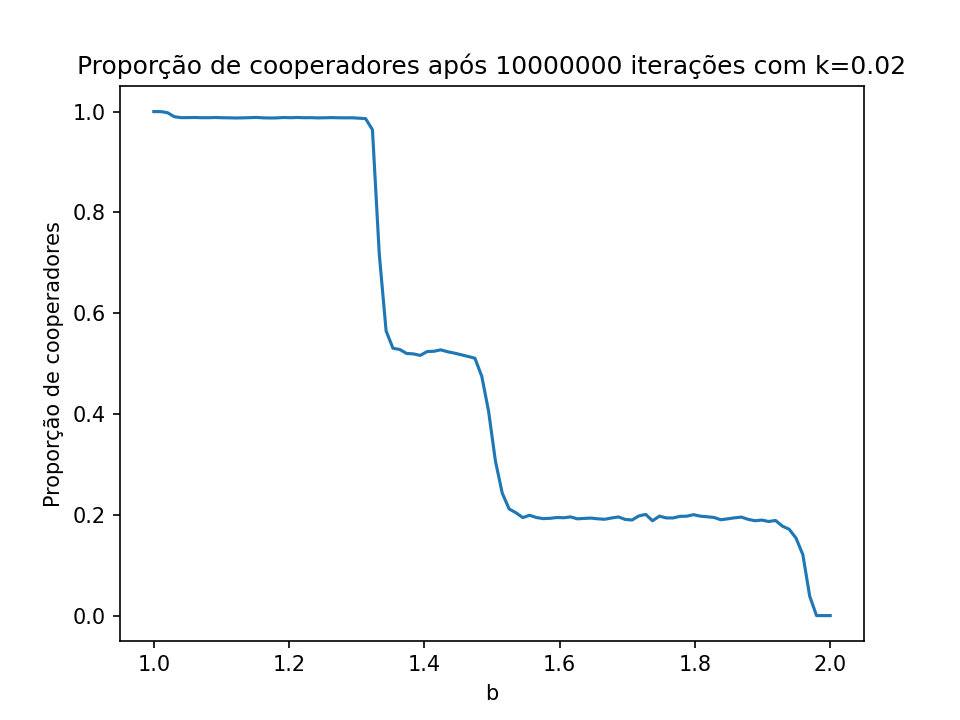

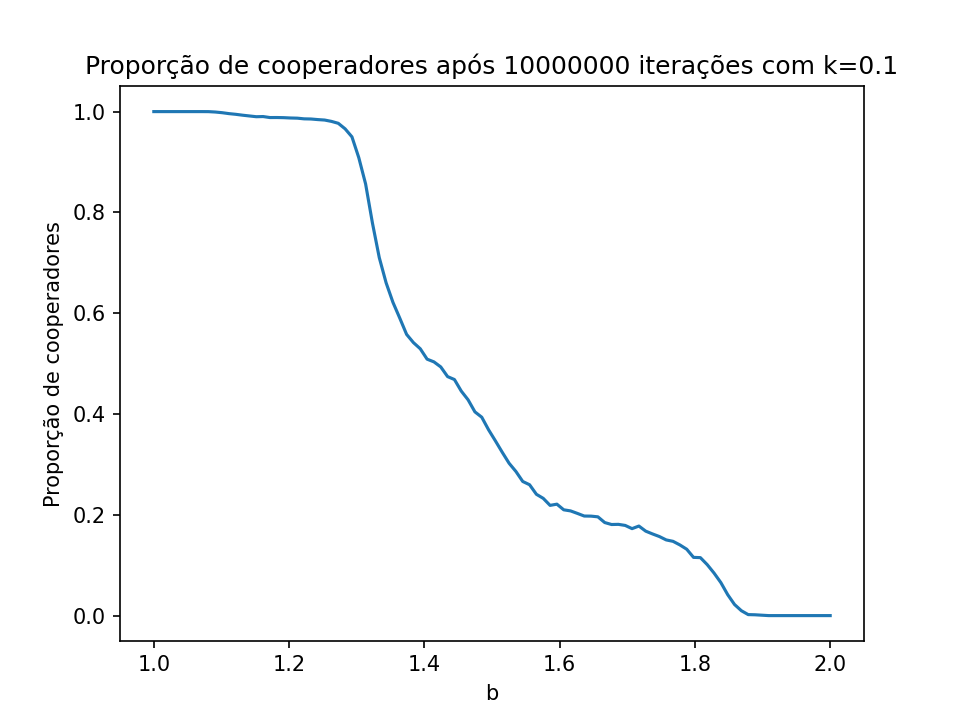

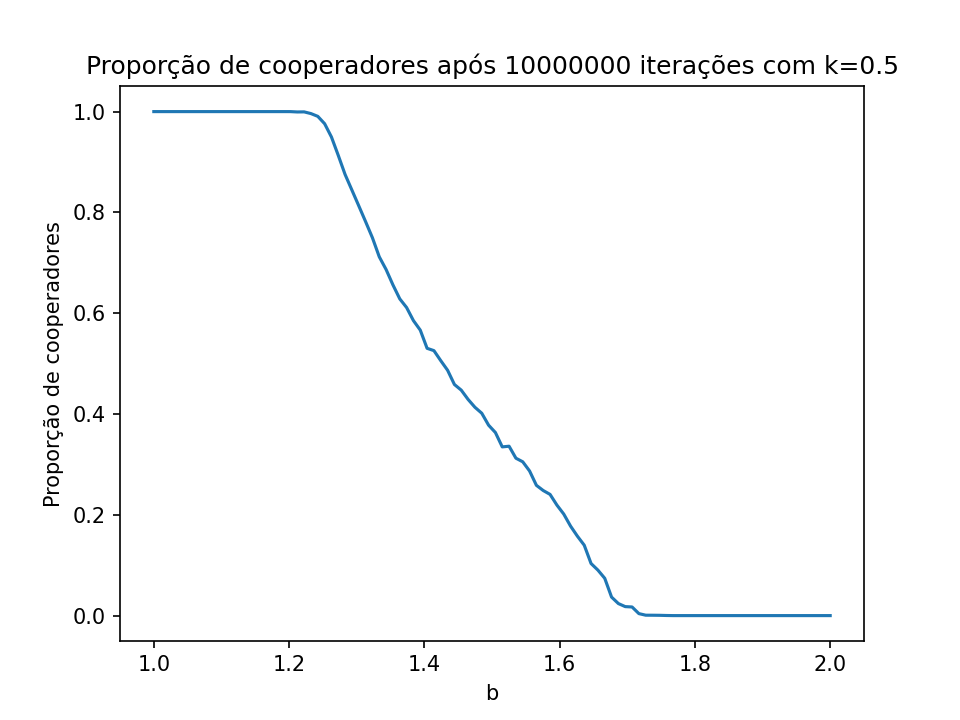

In [1]:
players = np.random.choice(a=[False, True], size=(N, N))

for k in [0.02, 0.1, 0.5]:
    helpers, linspace = plot_proportions(100, ITERATIONS, k)
    plt.title(f"Proporção de cooperadores após {ITERATIONS} iterações com k={k}")
    plt.xlabel("b")
    plt.ylabel("Proporção de cooperadores")
    plt.plot(linspace, helpers)
    plt.show()

Não foi analisada a distribuição espacial dos cooperadores e desertores.

Para $K=0.02$ é possível estimar que o valor de $b_1$ é próximo de 1, enquanto o valor de $b_2$ é próximo de 2.

Para $K=0.1$ é possível estimar que o valor de $b_1$ é próximo de 1.1, enquanto o valor de $b_2$ é próximo de 1.85.

Para $K=0.5$ é possível estimar que o valor de $b_1$ é próximo de 1.25, enquanto o valor de $b_2$ é próximo de 1.75.